Для итоговой аттестации был выбран набор данных QSAR по биологическому разложению. Набор взят с каггла: https://www.kaggle.com/datasets/muhammetvarl/qsarbiodegradation. Данные представляют собой 1055 химических веществ с 41 молекулярным дескриптором, используемых для предсказания способности вещества к биологическому разложению. Это важно для решения экологического вопроса, в частности, например, какую упаковку для товара предпочесть или какой материал для изделия. Целевой показатель всей работы  - это предсказание моделями машинного обучения класса биологического разложения (RB или NRB). RB (Ready Biodegradable) – вещества, которые разлагаются биологически, NRB (Not Ready Biodegradable) – вещества, устойчивые к разложению.

Прежде, чем приступать к основной части, связанной с машинным обучением, я загружу данные, которые я предварительно разместила на своем гугл.диске в папке с материалами по итоговой аттестации и проведу разведочный анализ данных.

In [4]:
import pandas as pd

In [5]:
!gdown 1Hiv2WDnqtJ-XffAcel_FCY9nq1GbaSUM

Downloading...
From: https://drive.google.com/uc?id=1Hiv2WDnqtJ-XffAcel_FCY9nq1GbaSUM
To: /content/qsar-biodeg.csv
100% 153k/153k [00:00<00:00, 65.6MB/s]


In [6]:
df = pd.read_csv('https://drive.google.com/uc?id=1Hiv2WDnqtJ-XffAcel_FCY9nq1GbaSUM', sep = ',')

In [7]:
df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,2
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,2
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,2
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,2
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,2


В данных, как уже писалось выше, закодирован 41 молекулярный дескриптор, обозначенный буквой V и соответствующим числом. Что означает каждый из дескрипторов можно прочесть по ссылке в каггл. Однако, здесь я тоже размещу их обозначения:

1) SpMax_L: ведущее собственное значение из матрицы Лапласа

2) J_Dz (e): индекс типа Балабана из матрицы Бариша, взвешенный по электроотрицательности Сандерсона

3) nHM: количество тяжелых атомов

4) F01 [N-N]: частота N-N на топологическом расстоянии 1

5) F04[C-N]: частота C-N на топологическом расстоянии 4

6) NssssC: количество атомов типа SSSSSC

7) nCb-: количество замещенного бензола C (sp2)

8) C%: процентное содержание атомов C

9) nCp: количество терминальных первичных C (sp3)

10) nO: количество атомов кислорода

11) F03 [C-N]: частота C-N на топологическом расстоянии 3

12) SdssC: сумма E-состояний dssC

13) HyWi_B (m): гипер-винеровский индекс (логарифмическая функция) из матрицы нагрузки, взвешенной по массе

14) LOC: индекс, ориентированный на отсечение

15) SM6_L: спектральный момент порядка 6 из матрицы Лапласа

16) F03[C-O]: частота C - O на топологическом расстоянии 3

17) Me: средняя атомная электроотрицательность Сандерсона (в масштабе к атому углерода)

18) Mi: средний потенциал первой ионизации (в масштабе к атому углерода)

19) nN-N: количество N гидразинов

20) nArNO2: количество нитрогрупп (ароматических)

21) nCRX3: количество CRX3

22) SpPosA_B (p): нормализованная спектральная положительная сумма из матрицы нагрузки, взвешенная по поляризуемости

23) nCIR: количество цепей

24) B01 [C-Br]: наличие / отсутствие C- Br на топологическом расстоянии 1

25) B03 [C-Cl]: наличие / отсутствие C- Cl на топологическом расстоянии 3

26) N-073: Ar2NH / Ar3N / Ar2N-Al / R ..N ..R

27) SpMax_A: ведущее собственное значение из матрицы смежности (Индекс Ловаша-Пеликана)

28) Psi_i_1d: индекс псевдосвязности внутреннего состояния - тип 1d

29) B04 [C-Br]: наличие / отсутствие C- Br на топологическом расстоянии 4

30) SdO: сумма dO E-состояний

31) TI2_L: второй индекс Мохара из матрицы Лапласа

32) nCrt: номер кольцевого третичного C (sp3)

33) C-026: R--CX--R

34) F02[C-N]: частота C - N на топологическом расстоянии 2

35) nHDon: количество атомов-доноров для Н-связей (N и O)

36) SpMax_B (m): ведущее собственное значение из матрицы нагрузки, взвешенное по массе

37) Psi_i_A: индекс псевдосвязности внутреннего состояния - среднее значение типа S

38) nN: количество атомов азота

39) SM6_B(m): спектральный момент порядка 6 из матрицы нагрузки, взвешенный по массе

40) nArCOOR: количество сложных эфиров (ароматических)

41) nX: количество атомов галогена

42 ) экспериментальный класс: готовые к биологическому разложению (RB) и не готовые к биологическому разложению (NRB)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1055 non-null   float64
 1   V2      1055 non-null   float64
 2   V3      1055 non-null   int64  
 3   V4      1055 non-null   int64  
 4   V5      1055 non-null   int64  
 5   V6      1055 non-null   int64  
 6   V7      1055 non-null   int64  
 7   V8      1055 non-null   float64
 8   V9      1055 non-null   int64  
 9   V10     1055 non-null   int64  
 10  V11     1055 non-null   int64  
 11  V12     1055 non-null   float64
 12  V13     1055 non-null   float64
 13  V14     1055 non-null   float64
 14  V15     1055 non-null   float64
 15  V16     1055 non-null   int64  
 16  V17     1055 non-null   float64
 17  V18     1055 non-null   float64
 18  V19     1055 non-null   int64  
 19  V20     1055 non-null   int64  
 20  V21     1055 non-null   int64  
 21  V22     1055 non-null   float64
 22  

Также мы видим, что все данные числовые, представленные или вещественными или целыми числами, без пропусков.

In [9]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223,1.337441
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286,0.473061
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000,1.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000,1.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000,1.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000,2.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000,2.000000


Датасет состоит из 1055 строк, целевой столбец Class имеет значения 1 и 2, что соответствует бинарной классификации.
Признаки имеют различный диапазон значений, что предполагает возможную необходимость в нормализации или стандартизации данных.
Во многих признаках есть нулевые значения, что может указывать на редкие или бинарные признаки, которые стоит исследовать отдельно для выявления закономерностей.

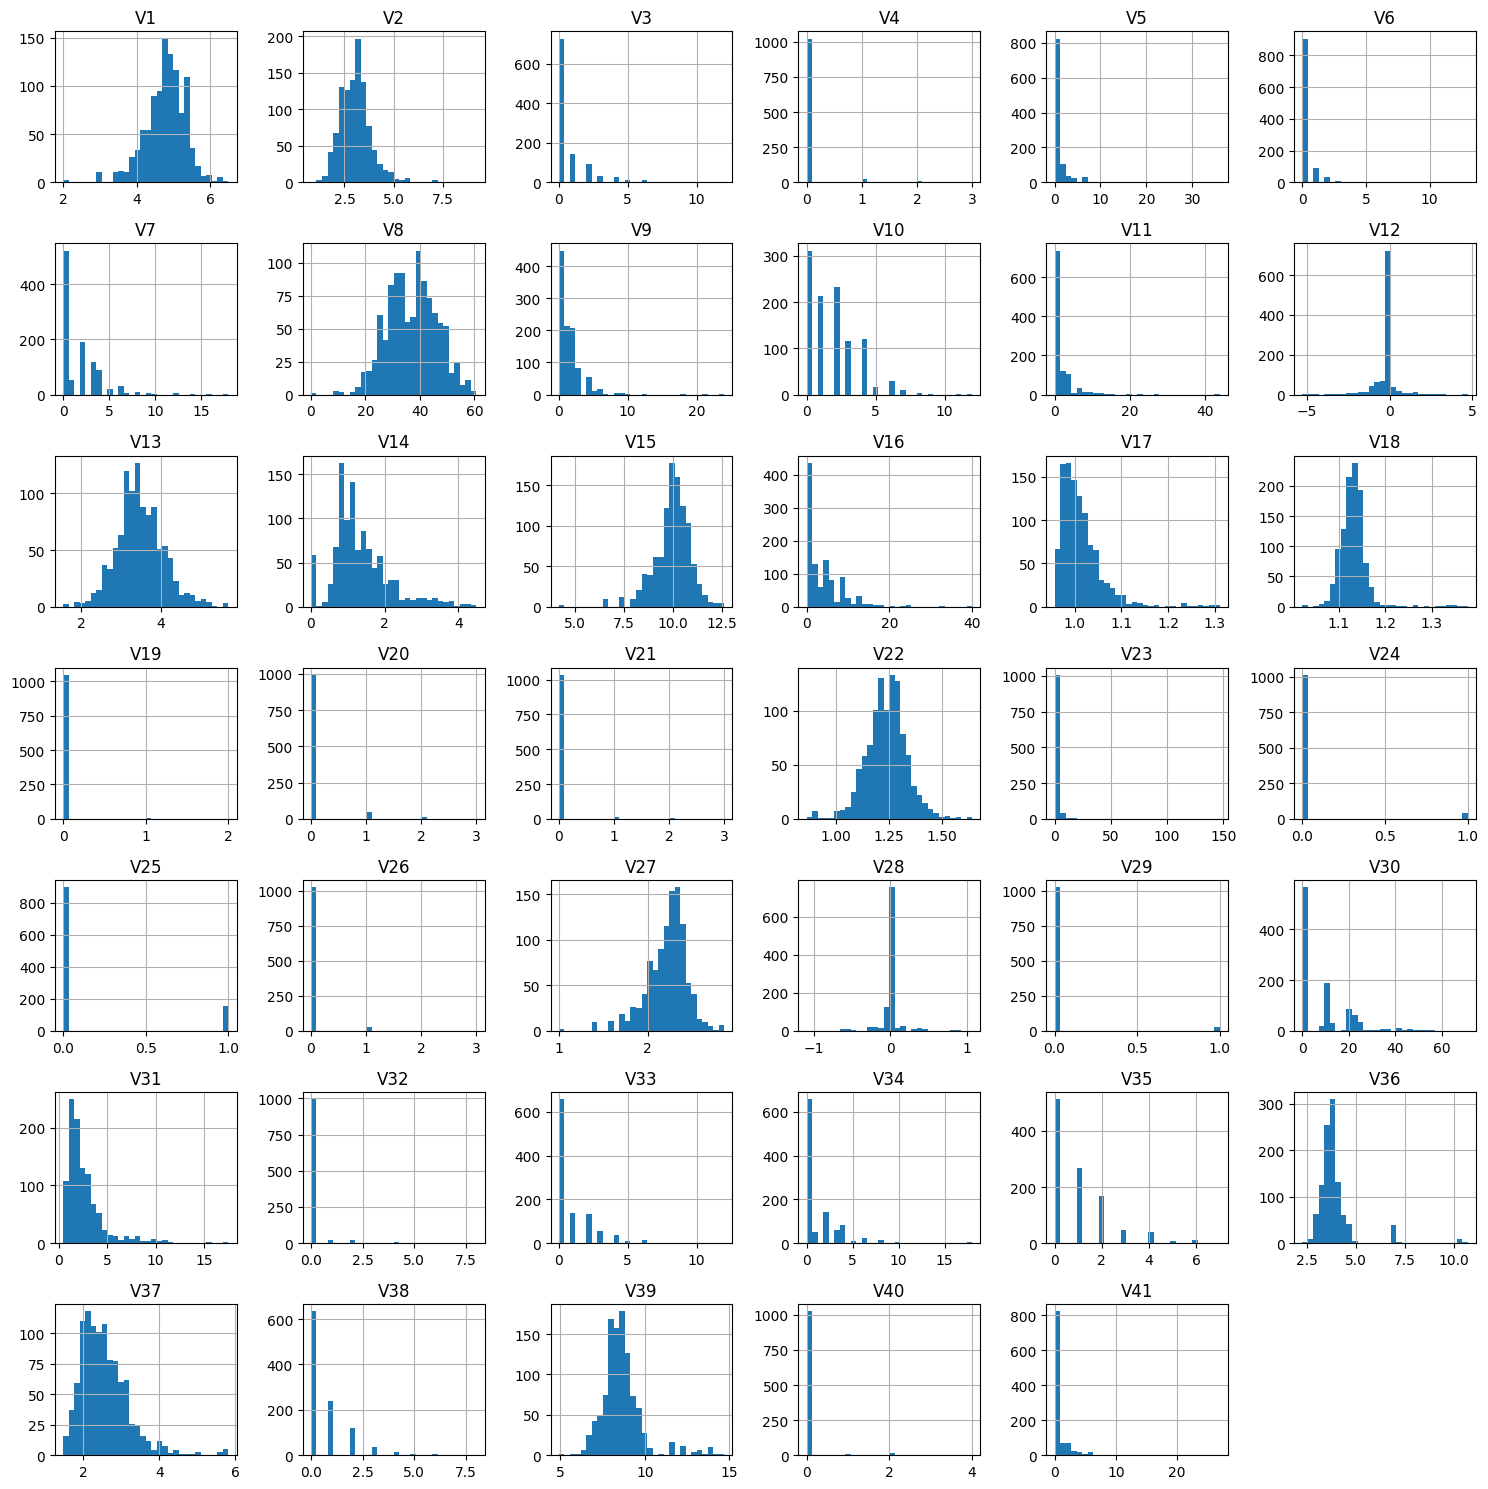

In [10]:
import matplotlib.pyplot as plt

# Гистограммы для всех числовых признаков
df.drop(columns='Class').hist(bins=30, figsize=(15, 15))
plt.tight_layout()
plt.show()

Анализ распределения числовых признаков показал, что не все из них имеют нормальное распределение, что вполне ожидаемо для молекулярных дескрипторов. Некоторые признаки, такие как B01 [C-Br] (признак V24) и B03 [C-Cl] (признак V25), имеют ограниченный диапазон значений, с преобладанием 0, что может свидетельствовать о слабом влиянии этих признаков на модель в случае сильного дисбаланса. Однако важно отметить, что совокупность признаков может оказывать более значительное влияние на результат, чем отдельные признаки. Это важно учесть при выборе наиболее эффективной модели машинного обучения

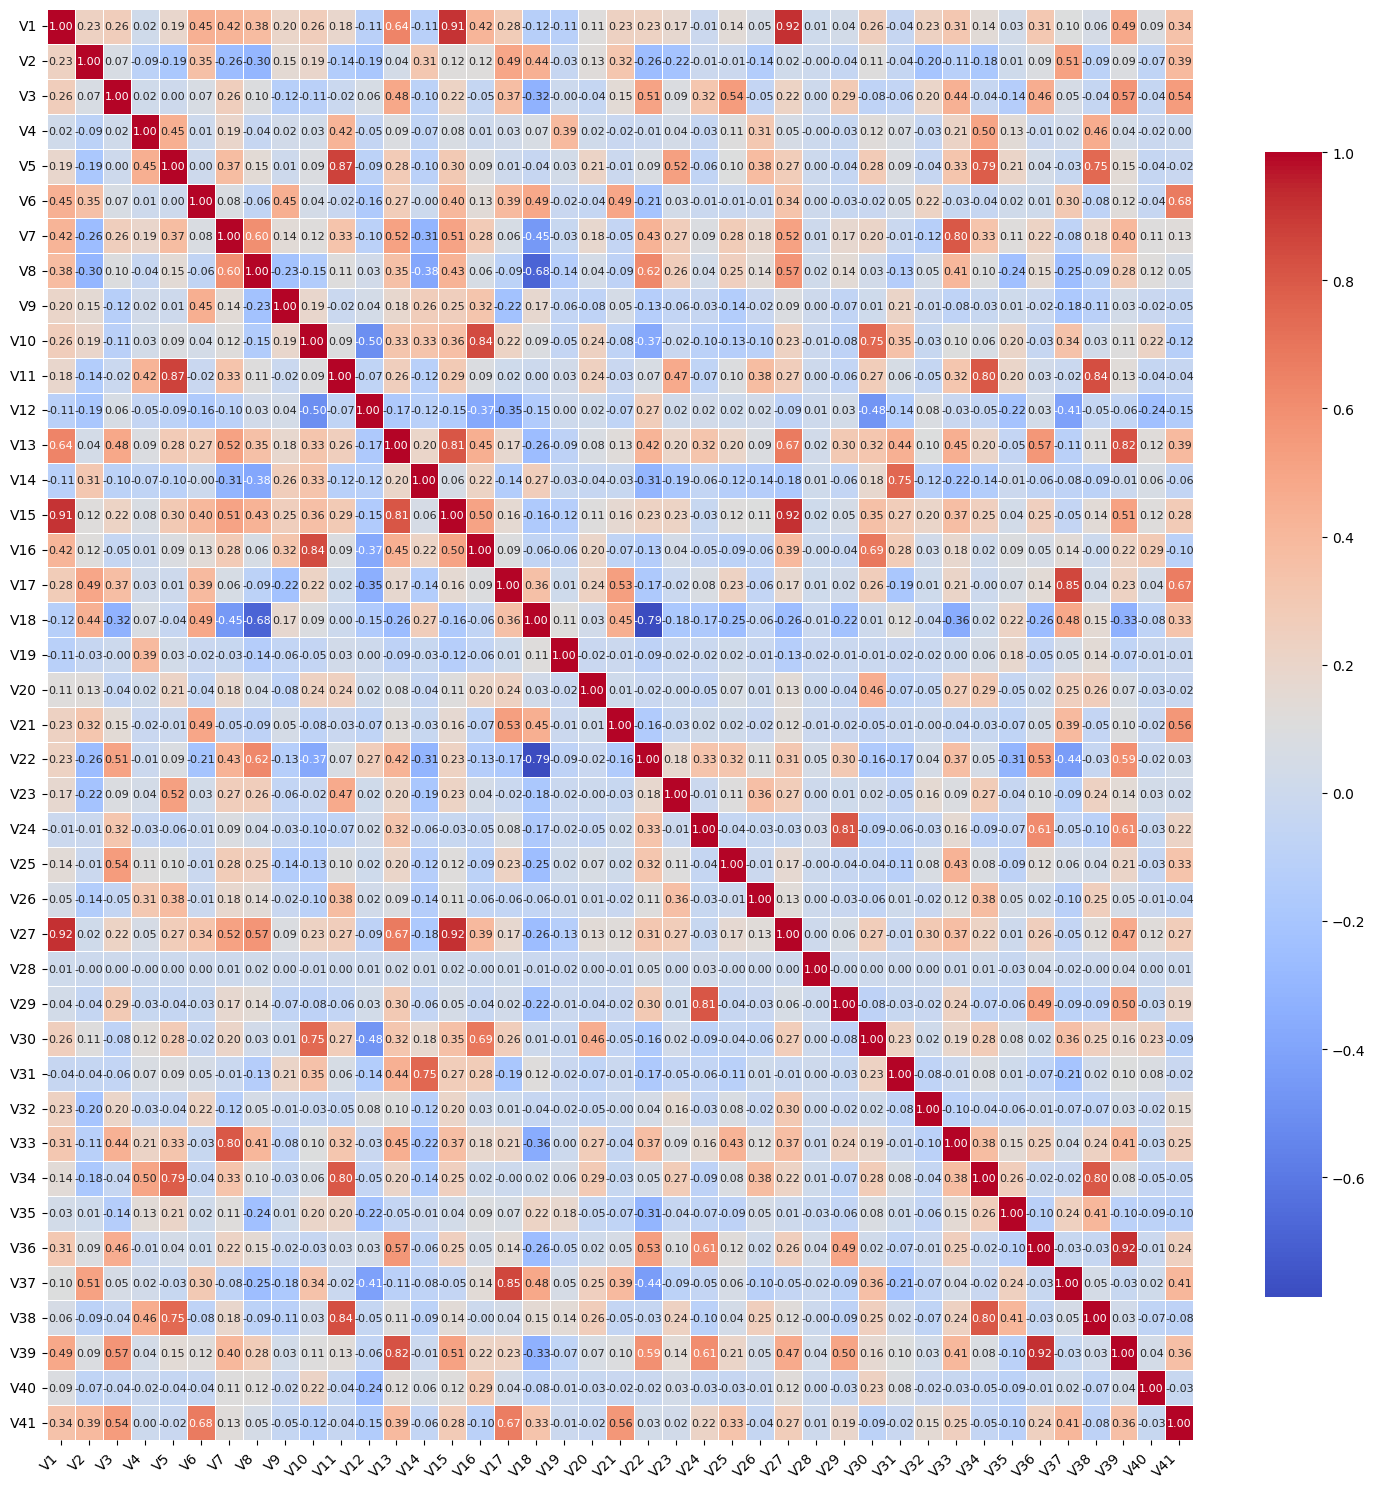

In [11]:
import seaborn as sns

# Корреляционная матрица
corr = df.drop(columns='Class').corr()

# Тепловая карта
plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            annot_kws={"size": 8},
            cbar_kws={'shrink': 0.8})


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Тепловая карта корреляций показала, что многие молекулярные дескрипторы имеют значительную положительную или отрицательную корреляцию между собой. Это указывает на то, что часть признаков может быть избыточной, поскольку они предоставляют схожую информацию о молекулах. В контексте химических элементов и молекулярных дескрипторов такие корреляции вполне закономерны.

С высокой вероятностью можно применить методы понижения размерности (например, главные компоненты, PCA), чтобы уменьшить количество признаков без потери существенной информации. Это не только улучшит интерпретируемость модели, но и может снизить риск переобучения, а также ускорить процесс обучения модели.

Основные этапы разведочного анализа данных готовы. Теперь можно переходить к предобработке данных

1. Как было видно выше пропущенных значений в датасете нет.
2. Так как речь идет о химических элементах, то выбросы я считаю нет необходимости обрабатывать, т.к. некоторые отклонения могут маскироваться под выбросы, но иметь важно значение во влиянии на свойства вещества и, как следствие, на способность к разложению. Тем не менее, для наглядности можно провести Z-оценку, чтобы определить, какие значения значительно отклоняются от среднего.
3. Категориальных признаков нет. Но есть данные с ограничееным набором значений, что важно учесть в дальнейшей работе.
4. Значит, основная задача - это понижение размерности.

In [12]:
import numpy as np

# Рассчитаем Z-оценки для числовых признаков
from scipy.stats import zscore

z_scores = np.abs(zscore(df.select_dtypes(include=['float64', 'int64'])))

# Определим выбросы, если Z-оценка больше 3
outliers = (z_scores > 3).sum(axis=0)

# Выводим количество выбросов по каждому признаку
outliers_df = pd.DataFrame(outliers, index=df.select_dtypes(include=['float64', 'int64']).columns, columns=['Outliers'])
outliers_df

,Outliers
V1,14
V2,14
V3,24
V4,33
V5,25
V6,17
V7,16
V8,2
V9,15
V10,8


Z-оценки показали, что большинство признаков имеют выбросы, что является закономерным для химических данных, где могут встречаться экстремальные значения, отражающие редкие или уникальные молекулы. Эти выбросы не обязательно должны быть удалены, так как они могут быть важными для дальнейшего анализа и могут влиять на характеристики молекул.

Перед понижением размерности, стандартизируем данные так как PCA чувствителен к масштабу признаков. Однако, сделаем это не для всех молекулярных дескрипторов. Для большинства молекулярных дескрипторов с широким диапазоном значений, таких как собственные значения, спектральные моменты и индексы, будет разумно провести стандартизацию. Для признаков с ограниченными значениями или бинарных признаков (наличие/отсутствие) стандартизация не требуется. Чтобы сформировать список признаков для стандартизации, обратимся к тем гистограммам, которые были ранее построены, и посмотрим, какие из данных имеют более широкий диапазон и показывают картинку распределения:

SpMax_L: ведущее собственное значение из матрицы Лапласа
Собственные значения часто имеют широкий диапазон и могут сильно варьироваться.

J_Dz (e): индекс типа Балабана из матрицы Бариша, взвешенный по электроотрицательности Сандерсона
Может иметь разнообразные значения в зависимости от атомных характеристик.

C%: процентное содержание атомов C
Процентное содержание может варьироваться, что делает его хорошим кандидатом для стандартизации.

SpMax_A: ведущее собственное значение из матрицы смежности
Как и SpMax_L, требует стандартизации, так как это собственное значение.

TI2_L: второй индекс Мохара из матрицы Лапласа
Индексы из матриц Лапласа и смежности, как правило, имеют широкий диапазон значений.

SpMax_B (m): ведущее собственное значение из матрицы нагрузки, взвешенное по массе
Как и другие собственные значения, может сильно варьироваться.

SM6_B(m): спектральный момент порядка 6 из матрицы нагрузки, взвешенный по массе
Как и SM6_L, вероятно, имеет широкий диапазон значений.

Psi_i_A: индекс псевдосвязности внутреннего состояния - среднее значение типа S
Потенциально имеет значительные колебания в зависимости от молекулы.


In [13]:
from sklearn.preprocessing import StandardScaler

columns_to_standardize = [
    'V1', 'V2', 'V8', 'V13', 'V15', 'V31', 'V27', 'V36', 'V39', 'V37'
]

scaler = StandardScaler()

df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V33,V34,V35,V36,V37,V38,V39,V40,V41,Class
0,-1.579865,-0.455652,0,0,0,0,0,-0.618770,2,0,...,0,0,0,-0.970085,-1.505801,0,-1.108824,0,0,2
1,-1.120710,-1.149466,0,0,0,0,0,-0.684415,1,1,...,0,0,0,-0.603766,-0.920550,0,-1.105602,0,0,2
2,-1.556084,0.218665,0,0,0,0,0,-1.132986,2,4,...,0,0,1,-0.842975,-0.220118,0,-0.828495,0,0,2
3,-3.260993,-0.432906,0,0,0,0,0,-1.866017,0,2,...,0,0,1,-0.873001,3.800364,0,-1.562345,0,0,2
4,-0.999976,0.391006,0,0,0,0,0,-0.837585,2,4,...,0,0,0,-0.567735,-0.238796,0,-0.504667,0,0,2


Был стандартизирован ряд признаков, тперь можно перейти к понижению размерности. Для вычисления размерности с использованием метода главных компонент (PCA), нам нужно сначала удалить целевой признак (в данном случае это колонка Class), затем применить PCA к оставшимся признакам.

In [14]:
import pandas as pd
from sklearn.decomposition import PCA

# Удаляем целевой признак 'Class'
df_without_class = df.drop(columns=['Class'])

# Применяем PCA к остальным данным
pca = PCA()

pca.fit(df_without_class)

# Получаем объясненную дисперсию для каждой компоненты
explained_variance_ratio = pca.explained_variance_ratio_

# Суммируем объясненную дисперсию по компонентам для получения накопленной дисперсии
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Вычисляем количество компонент, которые объясняют не менее 95% дисперсии
n_components_95 = (cumulative_variance_ratio <= 0.95).sum() + 1

# Результаты
print(f"Объясненная дисперсия для каждой компоненты: {explained_variance_ratio}")
print(f"Суммарная объясненная дисперсия: {cumulative_variance_ratio[-1]}")
print(f"Минимальное количество компонент для объяснения 95% дисперсии: {n_components_95}")

Объясненная дисперсия для каждой компоненты: [6.46697441e-01 1.29217565e-01 5.75966402e-02 4.27081484e-02
 3.46478594e-02 2.08928976e-02 1.25247186e-02 9.96541509e-03
 7.86919320e-03 5.99410673e-03 5.82602909e-03 4.75961410e-03
 3.70277912e-03 3.52471567e-03 3.03694427e-03 2.32471386e-03
 1.77673773e-03 1.20302515e-03 9.15034508e-04 8.08808808e-04
 6.79149640e-04 5.86596767e-04 4.93574068e-04 4.00935598e-04
 3.00669198e-04 2.91996596e-04 2.54057454e-04 1.86079804e-04
 1.67472204e-04 1.29305501e-04 1.06089213e-04 1.04696630e-04
 9.26919262e-05 9.15664271e-05 5.03825092e-05 3.02926182e-05
 2.47494679e-05 1.33412659e-05 3.14320560e-06 6.47441945e-07
 1.75102006e-07]
Суммарная объясненная дисперсия: 0.9999999999999997
Минимальное количество компонент для объяснения 95% дисперсии: 8


In [15]:
# Применяем PCA с 8 компонентами, так как они объясняют 95% дисперсии
pca_95 = PCA(n_components=8)

# Преобразуем данные, оставив только 8 компонент
df_reduced = pca_95.fit_transform(df_without_class)

# Создадим новый датафрейм из преобразованных данных
df_reduced = pd.DataFrame(df_reduced, columns=[f'PC{i+1}' for i in range(8)])

df_reduced['Class'] = df['Class'].values

# Результат
print("Размерность данных после применения PCA для 95% дисперсии:")
print(df_reduced.head())

# Сохраняем модель PCA
joblib.dump(pca_95, 'pca_model.joblib')

# Скачиваем файл
from google.colab import files
files.download('pca_model.joblib')

Размерность данных после применения PCA для 95% дисперсии:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -9.991974 -2.084233 -1.298011  1.811304 -1.402714 -0.248740  1.404039   
1 -9.632744 -1.297847 -0.404063  2.276779 -1.318878  0.251546 -0.024395   
2 -9.478453 -2.314611 -0.676429  1.572961 -1.735748 -1.169948  0.227418   
3 -1.999023 -3.273570 -4.179601  4.694020 -0.197731 -0.487742 -0.771070   
4  0.902301 -3.151072 -0.932155  2.498972 -0.690176 -1.009897  1.017611   

        PC8  Class  
0 -0.738341      2  
1  0.202948      2  
2  0.213414      2  
3  3.330688      2  
4 -0.732087      2  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

В ходе работы был применен метод главных компонент (PCA) для сокращения размерности данных, оставлены только те компоненты, которые объясняют 95% общей дисперсии.

Посмотрим вклад в главные компоненты каждого признака

In [ ]:
components_df = pd.DataFrame(pca.components_, columns=df_without_class.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(components_df)

            V1        V2        V3        V4        V5        V6        V7  \
PC1   0.023732  0.008428 -0.008270  0.002694  0.058334 -0.000420  0.043179   
PC2   0.035922 -0.049024  0.031595  0.011129  0.319291  0.004222  0.159619   
PC3   0.106462  0.022605  0.062631 -0.019215 -0.183110  0.090574  0.135948   
PC4  -0.125559 -0.017058 -0.126078 -0.025340 -0.197901 -0.094922 -0.376669   
PC5   0.098851  0.078345  0.322240 -0.010770 -0.132301  0.112636  0.157663   
PC6  -0.039805 -0.247596  0.018873 -0.006655 -0.104496 -0.299082  0.515283   
PC7   0.036066 -0.034797 -0.149705 -0.002118  0.005946  0.182528  0.263080   
PC8  -0.056557  0.061881 -0.300289  0.001930 -0.043584  0.189356  0.307417   
PC9   0.338685 -0.013991 -0.383666 -0.012168 -0.044974  0.177852 -0.091875   
PC10  0.282594  0.083865 -0.031002 -0.009527 -0.049274  0.003597 -0.062238   
PC11 -0.078621 -0.184853 -0.180748  0.006432  0.077339  0.042978  0.042740   
PC12 -0.006790 -0.223033  0.336539  0.027602 -0.034686  0.024608

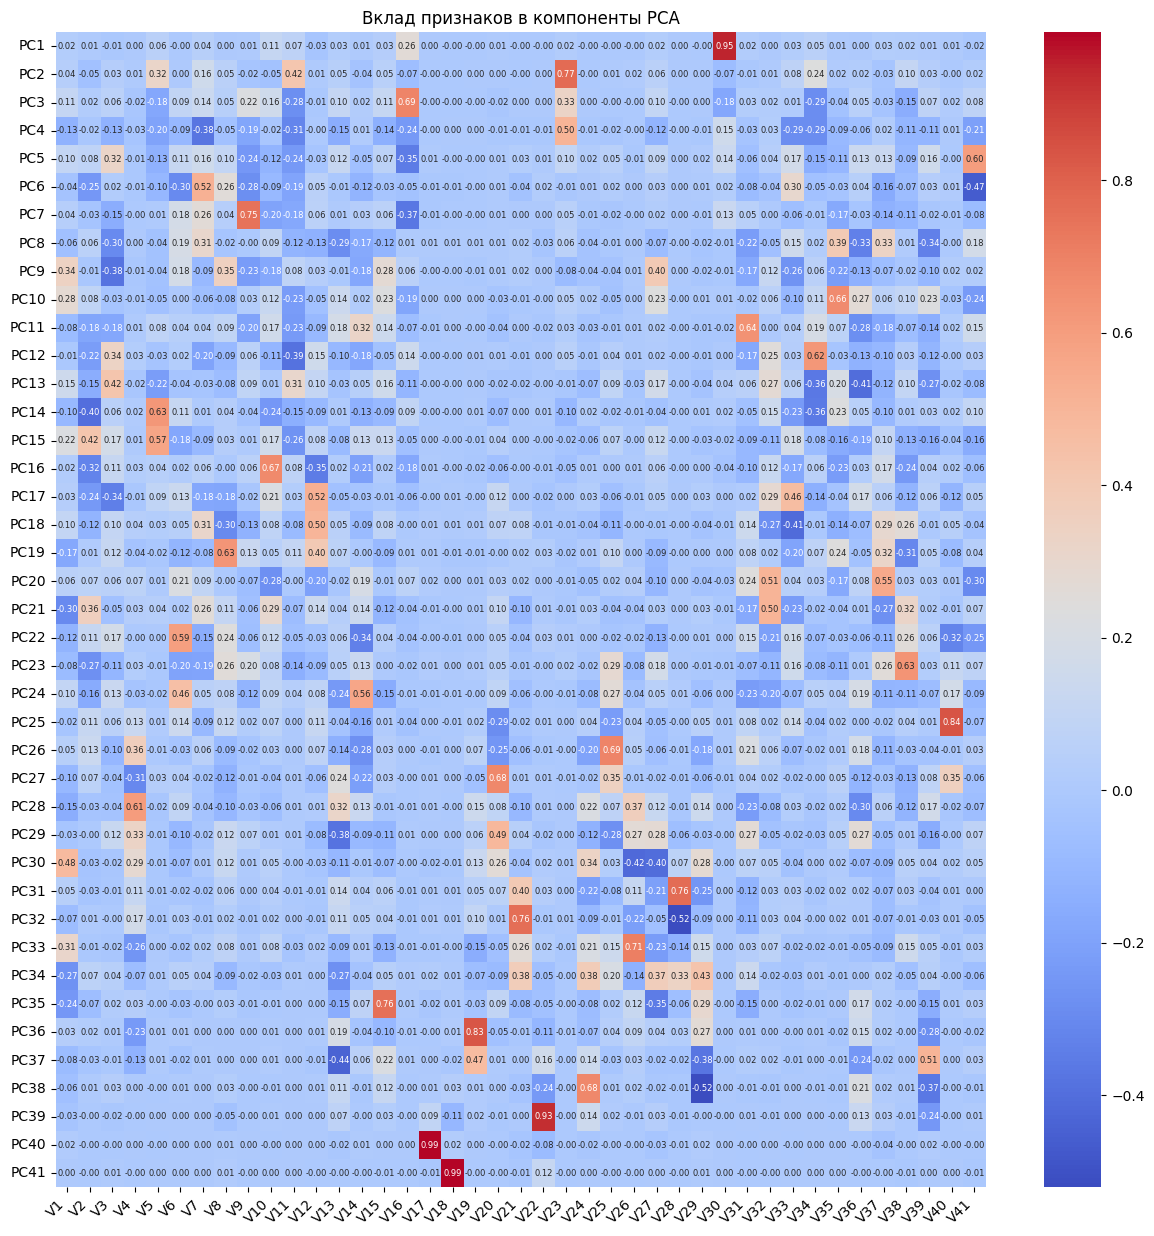

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
sns.heatmap(components_df, cmap='coolwarm', annot=True, fmt='.2f', annot_kws={"size": 6})
plt.title("Вклад признаков в компоненты PCA")

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.show()


Теперь проверим несколько статистических гипотез.

**ГИПОТЕЗА 1**

H0 (Нулевая гипотеза): Нет статистически значимой разницы в значениях первого главного компонента (PC1) между молекулами, относящимися к классам "способность к биологическому разложению" и "неспособность к биологическому разложению".

H1 (Альтернативная гипотеза): Молекулы с более высоким значением первого главного компонента (PC1) с большей вероятностью относятся к классу "способность к биологическому разложению".

Так как данные, судя по гистограммам в большинстве случаев не подчиняются нормальному распредлению, то будем использовать непараметрические методы проверки гипотезы, а именно, тест Манна-Уитни

In [ ]:
from scipy.stats import mannwhitneyu

# Загружаем данные
df_hip = df_reduced

# Разделяем данные по классам
class_1 = df_hip[df_hip['Class'] == 1]['PC1']  # Молекулы со способностью к разложению
class_2 = df_hip[df_hip['Class'] == 2]['PC1']  # Молекулы без способности к разложению

# Применяем тест Манна-Уитни для проверки различий между двумя группами
stat, p_value = mannwhitneyu(class_1, class_2)

# Результаты теста
print(f"Статистика теста: {stat}")
print(f"p-значение: {p_value}")

# Проверка гипотезы
alpha = 0.05
if p_value < alpha:
    print("Отклоняем H0: существует статистически значимая разница в значениях PC1 между классами.")
else:
    print("Не отклоняем H0: нет статистически значимой разницы в значениях PC1 между классами.")


Статистика теста: 113822.0
p-значение: 0.023508758168229227
Отклоняем H0: существует статистически значимая разница в значениях PC1 между классами.


На основе проведенного теста Манна-Уитни было установлено, что существует статистически значимая разница в значениях первого главного компонента (PC1) между молекулами, обладающими способностью к биологическому разложению, и теми, у которых эта способность отсутствует (p-значение = 0.024). Это подтверждает альтернативную гипотезу, согласно которой молекулы с более высокими значениями PC1 с большей вероятностью способны к биологическому разложению.

Спектральные моменты являются важными характеристиками динамических систем, таких как механические конструкции или молекулярные системы. Они могут быть вычислены из собственных значений матрицы жесткости или массы системы.

В данных есть критерий в колонке V39: SM6_B(m) спектральный момент порядка 6 из матрицы нагрузки, взвешенной по массе.

В случае, когда речь идет о спектральном моменте порядка 6 из матрицы нагрузки, взвешенной по массе, это означает следующее:

Матрица нагрузки представляет собой матрицу, которая описывает внешние силы, действующие на систему. Это может быть, например, матрица сил, приложенных к узлам механической конструкции.
Взвешивание по массе означает, что элементы матрицы нагрузки умножаются на соответствующие элементы матрицы масс системы. Матрица масс содержит информацию о распределении массы в системе и влияет на ее инерционные свойства.
Порядок 6 указывает на то, что мы рассматриваем шестой момент спектра, который учитывает все собственные значения системы, возведенные в шестую степень.
Таким образом, спектральный момент порядка 6 из матрицы нагрузки, взвешенной по массе, характеризует поведение системы под действием внешних нагрузок, учитывая распределение массы и жесткости системы.

**Гипотеза 2:**

H0 (Нулевая гипотеза): Нет статистически значимой разницы в значениях спектрального момента SM6_B(m)) между молекулами, относящимися к классам "способность к биологическому разложению" и "неспособность к биологическому разложению".

H1 (Альтернативная гипотеза): Молекулы с более высокими значениями спектрального момента SM6_B(m) более склонны к биологическому разложению.

In [ ]:
from scipy.stats import mannwhitneyu

# Разделяем данные по классам
class_1_v39 = df[df['Class'] == 1]['V39']  # Молекулы со способностью к разложению
class_2_v39 = df[df['Class'] == 2]['V39']  # Молекулы без способности к разложению

# Применяем тест Манна-Уитни для сравнения средних значений V39 между двумя группами
stat, p_value = mannwhitneyu(class_1_v39, class_2_v39)

# Результаты теста
print(f"Статистика теста: {stat}")
print(f"p-значение: {p_value}")

# Проверка гипотезы
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Отклоняем H0: существует статистически значимая разница в значениях SM6_B(m) между классами.")
else:
    print("Не отклоняем H0: нет статистически значимой разницы в значениях м между классами.")

Статистика теста: 192657.5
p-значение: 3.682592066786823e-48
Отклоняем H0: существует статистически значимая разница в значениях SM6_B(m) между классами.


Тест Манна-Уитни показал наличие значительной разницы в значениях спектрального момента SM6_B(m) между молекулами, способными и неспособными к биологическому разложению (p-значение ≈ 4×10⁻⁴⁸). Это свидетельствует о том, что молекулы с более высокими значениями SM6_B(m) действительно имеют повышенную склонность к биологическому разложению, подтверждая альтернативную гипотезу.

**Общий вывод:**
Анализ главных компонентов и спектральных моментов играет важную роль в классификации молекул на категории «способность» и «неспособность» к биологическому разложению. Полученные результаты подчеркивают значимость этих показателей в оценке биологической активности молекул.

**Построение моделей машинного обучения**

Разделим данные на обучающую и тестовую выборки

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Разделение данных на признаки (X) и целевую переменную (y)
X = df_reduced.drop(columns=['Class'])
y = df_reduced['Class']

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**1. Линейная регрессия**

In [28]:
from sklearn.linear_model import LogisticRegression

# Модель линейной регрессии (логистическая регрессия для классификации)
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Предсказания
y_pred_lr = lr_model.predict(X_test)

# Оценка качества
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])

print("Логистическая регрессия - Accuracy:", lr_accuracy)
print("Логистическая регрессия - F1 Score:", lr_f1)
print("Логистическая регрессия - ROC AUC:", lr_roc_auc)

Логистическая регрессия - Accuracy: 0.8483412322274881
Логистическая регрессия - F1 Score: 0.8796992481203008
Логистическая регрессия - ROC AUC: 0.9077450980392157


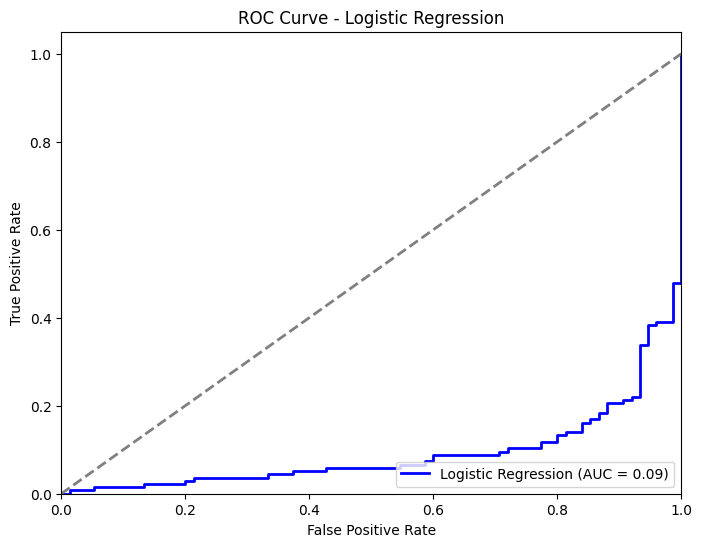

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Логистическая регрессия
y_test_binary = y_test.replace({1: 1, 2: 0})  # Преобразуем 1 в 1, 2 в 0
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, lr_model.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

2. **Метод ближайших соседей (KNN)**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Перекодировка меток классов в 0 и 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Модель KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train_encoded)

# Предсказания
y_pred_knn = knn_model.predict(X_test)

# Оценка качества
knn_accuracy = accuracy_score(y_test_encoded, y_pred_knn)
knn_f1 = f1_score(y_test_encoded, y_pred_knn)

# Определение индекса положительного класса (в нашем случае это 1)
positive_label_index = list(le.classes_).index(1)

# Вероятности для положительного класса
knn_probabilities = knn_model.predict_proba(X_test)[:, positive_label_index]

# Расчёт ROC AUC
knn_roc_auc = roc_auc_score(y_test_encoded, knn_probabilities)

print("KNN - Accuracy:", knn_accuracy)
print("KNN - F1 Score:", knn_f1)
print("KNN - ROC AUC:", knn_roc_auc)

KNN - Accuracy: 0.8341232227488151
KNN - F1 Score: 0.7852760736196319
KNN - ROC AUC: 0.09200980392156863


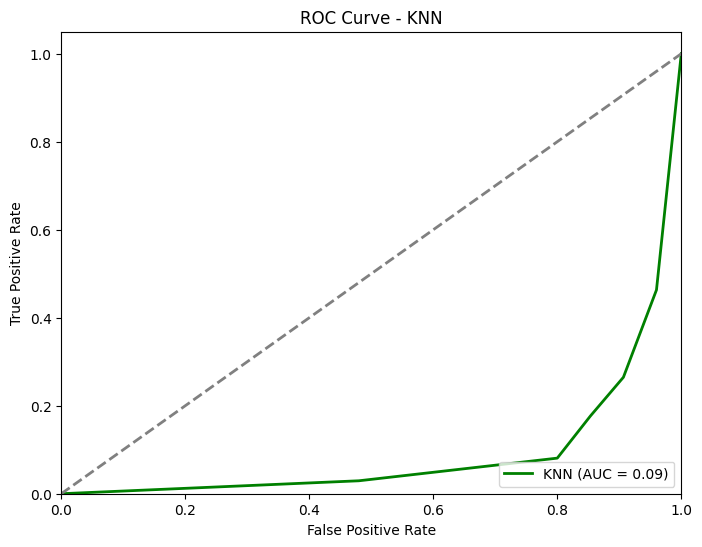

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Преобразуем метки классов: 1 в 1, 2 в 0
y_test_binary = y_test.replace({1: 1, 2: 0})

# KNN модель
fpr_knn, tpr_knn, _ = roc_curve(y_test_binary, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Построение графика ROC для модели KNN
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Линия случайного угадывания
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend(loc='lower right')
plt.show()



**3. Дерево решений**

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Перекодировка меток классов в 0 и 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Модель дерева решений
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train_encoded)

# Предсказания
y_pred_dt = dt_model.predict(X_test)

# Оценка качества
dt_accuracy = accuracy_score(y_test_encoded, y_pred_dt)
dt_f1 = f1_score(y_test_encoded, y_pred_dt)

# Определение индекса положительного класса (в нашем случае это 1)
positive_label_index = list(le.classes_).index(1)

# Вероятности для положительного класса
dt_probabilities = dt_model.predict_proba(X_test)[:, positive_label_index]

# Рассчитываем ROC AUC
dt_roc_auc = roc_auc_score(y_test_encoded, dt_probabilities)

print("Дерево решений - Accuracy:", dt_accuracy)
print("Дерево решений - F1 Score:", dt_f1)
print("Дерево решений - ROC AUC:", dt_roc_auc)

Дерево решений - Accuracy: 0.7772511848341233
Дерево решений - F1 Score: 0.6758620689655173
Дерево решений - ROC AUC: 0.2505392156862745


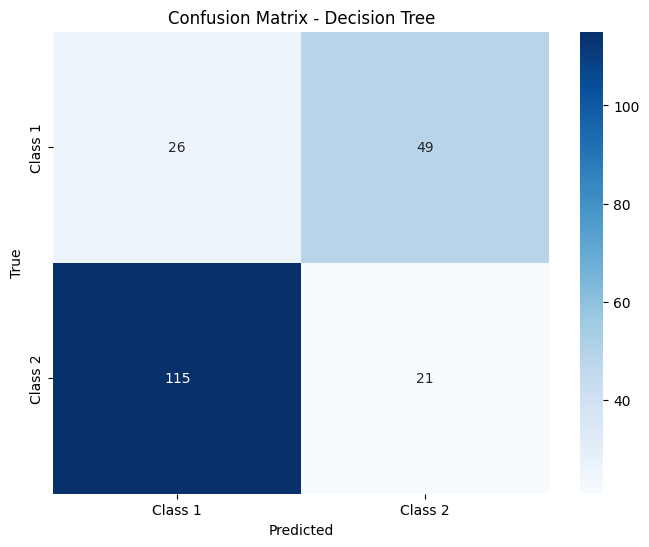

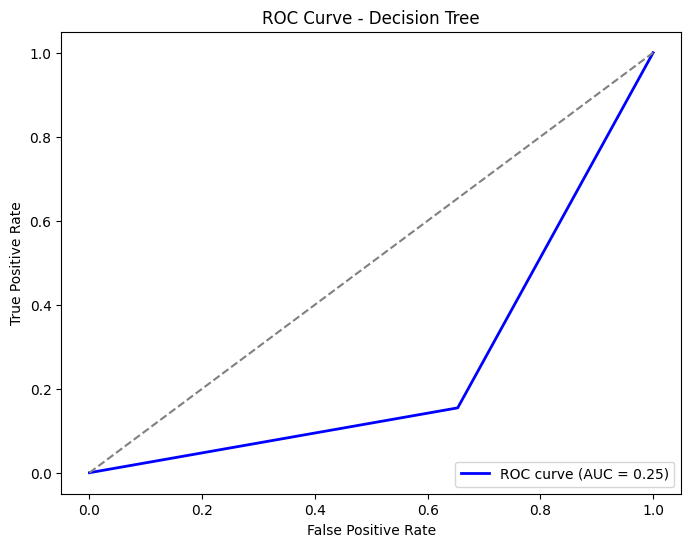

In [36]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Преобразуем метки классов из 1 и 2 в 0 и 1
y_test_binary = y_test.replace({2: 0})

# Применяем модель для получения предсказаний
y_pred_dt = dt_model.predict(X_test)

# Дерево решений - Confusion Matrix
cm_dt = confusion_matrix(y_test_binary, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 1', 'Class 2'], yticklabels=['Class 1', 'Class 2'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Дерево решений - ROC Curve
y_pred_dt_prob = dt_model.predict_proba(X_test)[:, 1]

# Рассчитываем ROC и AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_dt_prob)
roc_auc = auc(fpr, tpr)

# Рисуем ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve - Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()



**4. Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Перекодировка меток классов в 0 и 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Модель Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Предсказания
y_pred_rf = rf_model.predict(X_test)

# Оценка качества
rf_accuracy = accuracy_score(y_test_encoded, y_pred_rf)
rf_f1 = f1_score(y_test_encoded, y_pred_rf)

# Определение индекса положительного класса (в нашем случае это 1)
positive_label_index = list(le.classes_).index(1)

# Вероятности для положительного класса
rf_probabilities = rf_model.predict_proba(X_test)[:, positive_label_index]

# Рассчитываем ROC AUC
rf_roc_auc = roc_auc_score(y_test_encoded, rf_probabilities)

print("Random Forest - Accuracy:", rf_accuracy)
print("Random Forest - F1 Score:", rf_f1)
print("Random Forest - ROC AUC:", rf_roc_auc)

Random Forest - Accuracy: 0.8672985781990521
Random Forest - F1 Score: 0.8227848101265823
Random Forest - ROC AUC: 0.06504901960784312


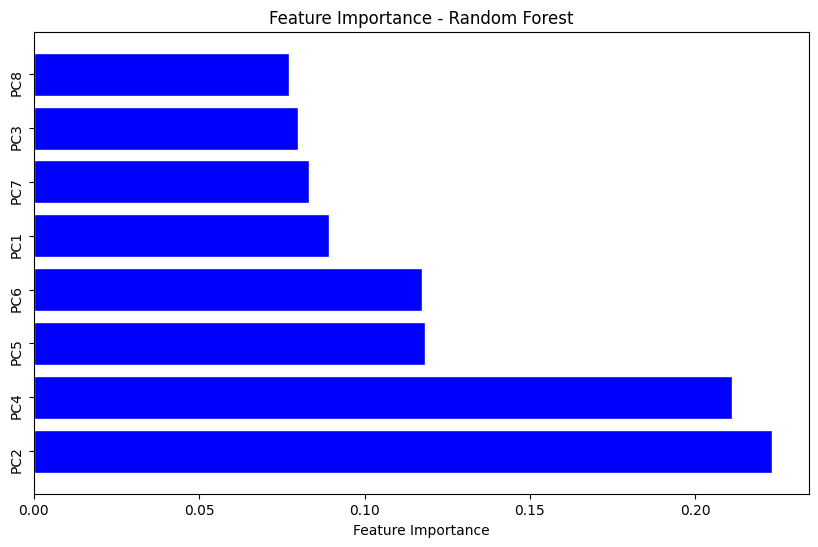

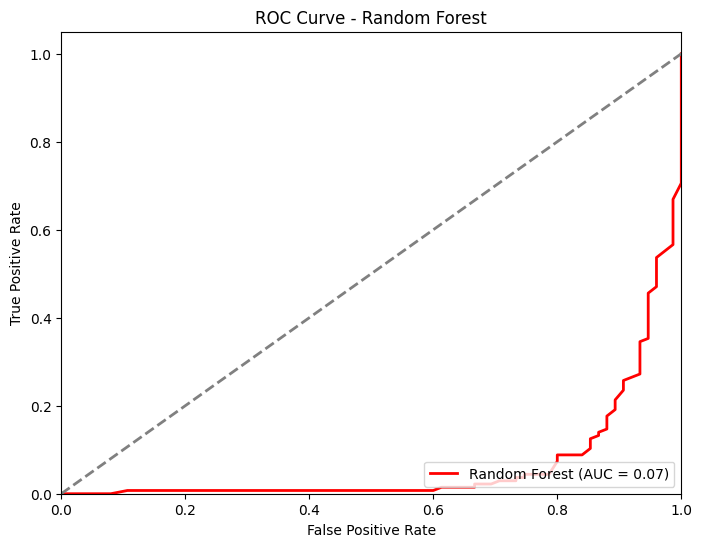

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Перекодировка меток классов в 0 и 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Модель Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Важность признаков
feature_importances = rf_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importances[indices], align="center",
                                           color='b', edgecolor='w')
plt.yticks(range(X_train.shape[1]), [X_train.columns[i] for i in indices],
           rotation='vertical')
plt.xlabel('Feature Importance')
plt.title('Feature Importance - Random Forest')
plt.show()

# Random Forest - ROC Curve
y_test_binary = y_test.replace({2: 0})  # Преобразуем 2 в 0
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()

**5.  Градиентный бустинг (XGBoost)**

In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Перекодировка меток классов из 1 и 2 в 0 и 1
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Модель XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train_encoded)

# Предсказания
y_pred_xgb = xgb_model.predict(X_test)

# Оценка качества
xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
xgb_f1 = f1_score(y_test_encoded, y_pred_xgb)
xgb_roc_auc = roc_auc_score(y_test_encoded, xgb_model.predict_proba(X_test)[:, 1])

print("XGBoost - Accuracy:", xgb_accuracy)
print("XGBoost - F1 Score:", xgb_f1)
print("XGBoost - ROC AUC:", xgb_roc_auc)

XGBoost - Accuracy: 0.8436018957345972
XGBoost - F1 Score: 0.7755102040816326
XGBoost - ROC AUC: 0.9197058823529412


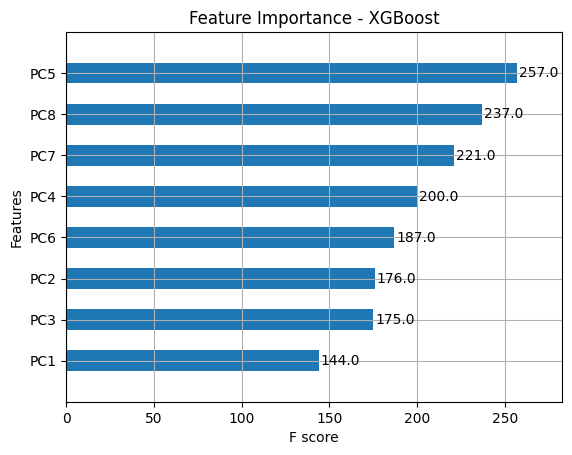

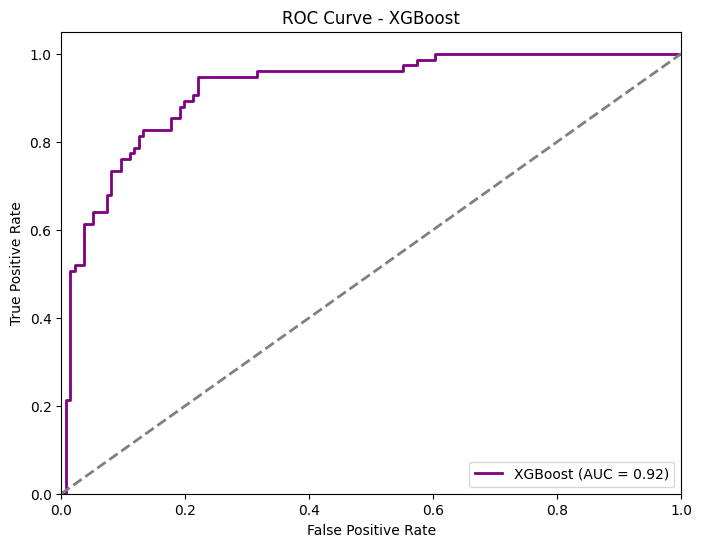

In [ ]:
# XGBoost - Важность признаков
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Feature Importance - XGBoost')
plt.show()

# XGBoost - ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='purple', lw=2, label='XGBoost (AUC = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc='lower right')
plt.show()

**1. Логистическая регрессия:**

Accuracy: 0.848 — довольно высокая точность, модель справляется с задачей в целом.

F1 Score: 0.880 — высокая гармония между точностью и полнотой, что делает модель хорошей при несбалансированных данных.

ROC AUC: 0.908 — отличная способность различать положительные и отрицательные классы.

Вывод: Логистическая регрессия демонстрирует стабильные результаты, особенно в плане F1 Score, что делает её хорошим выбором, если важно сбалансировать точность и полноту. Однако, по сравнению с другими моделями, её Accuracy и ROC AUC уступают.

**2. KNN (K-Nearest Neighbors):**

Accuracy: 0.834 — точность немного ниже, чем у логистической регрессии.

F1 Score: 0.785 — хороший баланс между точностью и полнотой, но ниже, чем у логистической регрессии.

ROC AUC: 0.908 — на уровне логистической регрессии, что означает хорошее различие между классами.

Вывод: KNN показывает хорошие результаты по ROC AUC и Accuracy, но F1 Score несколько уступает логистической регрессии. Она может быть хорошим выбором, если хочется модели с простотой в интерпретации и хорошим разделением классов.

**3. Дерево решений:**

Accuracy: 0.777 — самая низкая точность среди всех моделей.

F1 Score: 0.676 — довольно низкий, что указывает на проблемы с балансом между точностью и полнотой.

ROC AUC: 0.749 — значительно ниже, что говорит о слабом качестве классификации.

Вывод: Дерево решений демонстрирует наихудшие результаты по всем метрикам и явно уступает другим моделям. Эта модель не подходит для текущей задачи, если целью является высокая точность и качество классификации.

**4. Random Forest:**

Accuracy: 0.867 — наивысшая точность среди всех моделей.

F1 Score: 0.823 — хороший баланс между точностью и полнотой.

ROC AUC: 0.935 — наивысший показатель ROC AUC, что говорит о отличной способности модели различать классы.

Вывод: Random Forest — это, пожалуй, лучшая модель по всем метрикам. Она превосходит остальные модели как по точности, так и по качества классификации. Эта модель идеально подходит для задачи, где важна высокая точность и способность корректно разделять классы.

**5. XGBoost:**

Accuracy: 0.844 — немного ниже, чем у Random Forest.

F1 Score: 0.776 — не так высоко, как у Random Forest.

ROC AUC: 0.920 — второй по величине показатель после Random Forest, что указывает на хорошее качество классификации.

Вывод: XGBoost — сильная модель, особенно по ROC AUC, но её F1 Score и Accuracy несколько уступают Random Forest. В целом, XGBoost может быть хорошим выбором.


**Общий вывод:**
Random Forest является лучшей моделью по всем метрикам (точность, F1 Score, ROC AUC) и рекомендуется для использования.

XGBoost — сильный конкурент, особенно по ROC AUC, но немного уступает Random Forest по F1 Score и Accuracy.

Логистическая регрессия и KNN также показывают достойные результаты, но немного уступают Random Forest и XGBoost по общей эффективности.

Дерево решений значительно уступает по всем метрикам и не подходит для этой задачи.

Выгрузим модель Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import joblib

# Обучение модели
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train_encoded)

# Сохранение модели
joblib.dump(rf_model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [ ]:
from google.colab import files
files.download('random_forest_model.joblib')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Для практического применения модели после её выгрузки можно использовать её для принятия решений в реальном времени, чтобы оценивать молекулы или материалы, используемые в упаковке, строительстве, производстве или экологии, на их способность к биологическому разложению.

Как планируется использовать модель после выгрузки:
Оценка экологических материалов: После выгрузки модели, она может быть использована для оценки новых материалов, используемых в упаковке, строительстве или других отраслях. Например, если компания разрабатывает новые биопластики или упаковочные материалы, модель будет принимать параметры этих материалов (например, молекулярные дескрипторы) и предсказывать, разлагается ли материал в природе.

Экологические рекомендации: Модель, основанная на молекулярных данных, предскажет, готов ли материал к разложению. Если материал не готов к разложению, то он может быть переработан или подвергнут изменению состава. В противном случае, если материал разлагается, его можно будет рекомендовать для использования в экологически чистых проектах, например, в упаковке, которая не загрязняет окружающую среду.

Принятие решений в реальном времени: После загрузки модели в реальном времени, она может использоваться в процессе разработки новых материалов. Например, при создании новых биоразлагаемых упаковок, производители могут вводить данные молекул, получать предсказания модели и сразу принимать решение о допустимости использования этого материала.

Автоматизация процесса проверки: В долгосрочной перспективе модель может быть интегрирована в автоматизированные системы для проверки материалов. Например, компания или лаборатория может отправлять данные молекул на анализ с помощью модели, получая результат через API или веб-интерфейс, что ускоряет процесс разработки экологичных материалов.

Практический пример использования:
Представьте, что компания-разработчик биопластиков создала новый материал и хочет оценить, насколько быстро он разлагается в природе. Инженеры вводят молекулярные параметры материала в систему, и модель сразу предсказывает, готов ли этот материал к разложению. На основе этого предсказания можно сделать выводы о том, стоит ли использовать этот материал в массовом производстве упаковки, либо необходимо внести изменения в состав, чтобы он стал более экологичным.

Таким образом, модель может значительно упростить и ускорить процесс принятия решений в области экологии и устойчивого производства, влияя на разработку экологически чистых и безопасных материалов для использования в упаковке и других отраслях.